<a href="https://colab.research.google.com/github/FeloCR12/Challenge_Telecom_X_parte_2/blob/main/Challenge_TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🛠️ Preparación de los Datos**

In [ ]:
#Importamos las bibliotecas que vamos a utilizar para el análisis

import pandas as pd #para tratamiento de datos
import numpy as np #para estimaciones y calculos
import sklearn # para la generación de modelos
import seaborn as sns #para visualización
import matplotlib.pyplot as plt #para visualización
import yellowbrick #para visualización de modelo de machine learning

In [ ]:
#Importamos el archivo tratado y validamos su longitud

datos = pd.read_csv('/content/datos_tratados.csv')
datos.shape

(7267, 31)

In [ ]:
#Validamos las columnas

datos.head()

,customerID,Dejo_la_empresa?,Genero,Edad >= 65,Tiene_Pareja,Tiene_Dependientes,Meses_contrato,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tipo_contrato,Facturacion_electronica,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias,Suscurpción_telefono,Suscurpción_internet,Suscurpción_seguridad,Suscurpción_respaldo,Suscurpción_proteccion,Suscurpción_soporte,Suscurpción_TV,Suscurpción_peliculas,Total_suscripciones
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,1,1,0,1,0,1,1,0,5
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,1,1,0,0,0,0,0,1,3
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1,1,0,0,1,0,0,0,3
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1,1,0,1,1,0,1,1,6
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1,1,0,0,0,1,1,0,4


In [ ]:
#validamos los tipos de datos

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               7267 non-null   object 
 1   Dejo_la_empresa?         7043 non-null   object 
 2   Genero                   7267 non-null   object 
 3   Edad >= 65               7267 non-null   int64  
 4   Tiene_Pareja             7267 non-null   object 
 5   Tiene_Dependientes       7267 non-null   object 
 6   Meses_contrato           7267 non-null   int64  
 7   PhoneService             7267 non-null   object 
 8   MultipleLines            7267 non-null   object 
 9   InternetService          7267 non-null   object 
 10  OnlineSecurity           7267 non-null   object 
 11  OnlineBackup             7267 non-null   object 
 12  DeviceProtection         7267 non-null   object 
 13  TechSupport              7267 non-null   object 
 14  StreamingTV             

In [ ]:
#Eliminamos los vacios de Dejo_la_empresa?

datos = datos.dropna(subset = ['Dejo_la_empresa?'])

# Imputar con la mediana los faltantes en Charges.Total
datos['Charges.Total'] = datos['Charges.Total'].fillna(datos['Charges.Total'].median())

datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               7043 non-null   object 
 1   Dejo_la_empresa?         7043 non-null   float64
 2   Genero                   7043 non-null   int64  
 3   Edad >= 65               7043 non-null   int64  
 4   Tiene_Pareja             7043 non-null   int64  
 5   Tiene_Dependientes       7043 non-null   int64  
 6   Meses_contrato           7043 non-null   int64  
 7   PhoneService             7043 non-null   int64  
 8   MultipleLines            7043 non-null   object 
 9   InternetService          7043 non-null   object 
 10  OnlineSecurity           7043 non-null   object 
 11  OnlineBackup             7043 non-null   object 
 12  DeviceProtection         7043 non-null   object 
 13  TechSupport              7043 non-null   object 
 14  StreamingTV              7043

In [ ]:
#Bloqueamos los mensajes de advertencia

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Transformamos las variables no numericas

datos['Dejo_la_empresa?'] = datos['Dejo_la_empresa?'].replace({'No': 0, 'Yes':1})
datos['Genero'] = datos['Genero'].replace({'Male': 0, 'Female':1})
datos['Tiene_Pareja'] = datos['Tiene_Pareja'].replace({'No': 0, 'Yes':1})
datos['Tiene_Dependientes'] = datos['Tiene_Dependientes'].replace({'No': 0, 'Yes':1})
datos['PhoneService'] = datos['PhoneService'].replace({'No': 0, 'Yes':1})
datos['Facturacion_electronica'] = datos['Facturacion_electronica'].replace({'No': 0, 'Yes':1})
datos.sample(10)


,customerID,Dejo_la_empresa?,Genero,Edad >= 65,Tiene_Pareja,Tiene_Dependientes,Meses_contrato,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tipo_contrato,Facturacion_electronica,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias,Suscurpción_telefono,Suscurpción_internet,Suscurpción_seguridad,Suscurpción_respaldo,Suscurpción_proteccion,Suscurpción_soporte,Suscurpción_TV,Suscurpción_peliculas,Total_suscripciones
4902,6701-YVNQG,0.0,0,0,1,0,72,1,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,1,Credit card (automatic),88.70,6301.70,2.956667,1,1,1,1,1,1,1,1,8
2971,4123-DVHPH,0.0,0,0,1,0,9,1,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,1,Electronic check,88.05,801.30,2.935000,1,1,1,0,0,0,0,1,4
1863,2650-GYRYL,0.0,0,0,1,1,33,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,1,Bank transfer (automatic),19.45,600.25,0.648333,1,0,0,0,0,0,0,0,1
4345,5961-VUSRV,0.0,1,0,0,0,12,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,1,Bank transfer (automatic),19.35,219.35,0.645000,1,0,0,0,0,0,0,0,1
4179,5730-DBDSI,0.0,0,0,0,0,66,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Bank transfer (automatic),19.70,1253.80,0.656667,1,0,0,0,0,0,0,0,1
571,0817-HSUSE,0.0,0,0,0,0,1,1,No,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,75.50,75.50,2.516667,1,1,0,0,1,1,1,1,6
7091,9766-HGEDE,0.0,1,0,1,0,17,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Mailed check,19.35,307.00,0.645000,1,0,0,0,0,0,0,0,1
6322,8701-DGLVH,0.0,0,0,0,0,51,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.45,1042.65,0.681667,1,0,0,0,0,0,0,0,1
1967,2792-VPPET,0.0,0,0,0,0,3,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Electronic check,20.50,76.95,0.683333,1,0,0,0,0,0,0,0,1
2565,3580-GICBM,0.0,1,0,1,1,61,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,1,Mailed check,24.20,1445.20,0.806667,1,0,0,0,0,0,0,0,1


#🎯 **Correlación y Selección de Variables**

In [ ]:
#Revisamos la correlación de nuestras variables Charges.Total, Charges.Monthly, Cuentas_Diarias y Total_suscripciones

datos[['Charges.Total', 'Total_suscripciones', 'Charges.Monthly', 'Cuentas_Diarias']].corr()

,Charges.Total,Total_suscripciones,Charges.Monthly,Cuentas_Diarias
Charges.Total,1.000000,0.745065,0.650864,0.650864
Total_suscripciones,0.745065,1.000000,0.822187,0.822187
Charges.Monthly,0.650864,0.822187,1.000000,1.000000
Cuentas_Diarias,0.650864,0.822187,1.000000,1.000000


In [ ]:
#Revisamos la correlacion entre la variable Dejo_la_empresa?, contra la cantidad de meses de contrato y de cargos totales

datos[['Dejo_la_empresa?','Meses_contrato','Charges.Total']].corr()

,Dejo_la_empresa?,Meses_contrato,Charges.Total
Dejo_la_empresa?,1.000000,-0.352229,-0.199037
Meses_contrato,-0.352229,1.000000,0.825464
Charges.Total,-0.199037,0.825464,1.000000


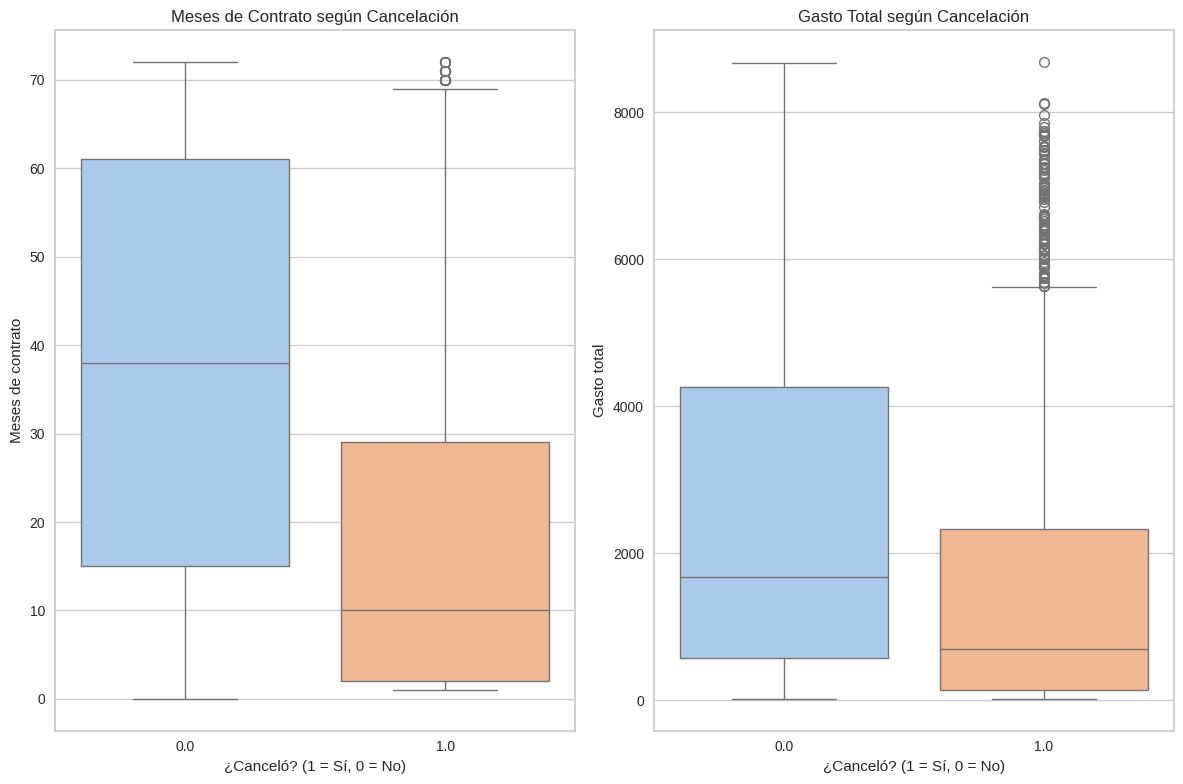

In [ ]:
#Veamos la relacion de forma gráfica

fig, ax = plt.subplots(1, 2, figsize = (12, 8)) #lienzo para dos graficos

# Boxplot1: Tiempo de contrato vs Cancelación

sns.boxplot(x = 'Dejo_la_empresa?', y = 'Meses_contrato', data = datos, ax = ax[0], palette='pastel') #grafico de la izquierda
ax[0].set_title('Meses de Contrato según Cancelación')
ax[0].set_xlabel('¿Canceló? (1 = Sí, 0 = No)')
ax[0].set_ylabel('Meses de contrato')


# Boxplot2: Gasto total vs Cancelación

sns.boxplot(x = 'Dejo_la_empresa?', y = 'Charges.Total', data = datos, ax = ax[1], palette='pastel') #grafico de la derecha
ax[1].set_title('Gasto Total según Cancelación')
ax[1].set_xlabel('¿Canceló? (1 = Sí, 0 = No)')
ax[1].set_ylabel('Gasto total')

plt.tight_layout() #para que los graficos no se solapen

plt.show()

In [ ]:
#Revisamos la correlacion entre la variable Dejo_la_empresa?, contra la cantidad de dependientes o de pareja y su genero

datos[['Dejo_la_empresa?','Tiene_Pareja','Tiene_Dependientes','Genero']].corr()

,Dejo_la_empresa?,Tiene_Pareja,Tiene_Dependientes,Genero
Dejo_la_empresa?,1.000000,-0.150448,-0.164221,0.008612
Tiene_Pareja,-0.150448,1.000000,0.452676,0.001808
Tiene_Dependientes,-0.164221,0.452676,1.000000,-0.010517
Genero,0.008612,0.001808,-0.010517,1.000000


In [ ]:
#Eliminamos las columnas que no me van a aportar a mi modelo puede ser por correlación o porque cree nuevas con la misma infromación

datos_limpios = datos.drop(columns = ['customerID', 'PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Charges.Monthly','Cuentas_Diarias'])
datos_limpios.sample(10)

,Dejo_la_empresa?,Genero,Edad >= 65,Tiene_Pareja,Tiene_Dependientes,Meses_contrato,Tipo_contrato,Facturacion_electronica,PaymentMethod,Charges.Total,Suscurpción_telefono,Suscurpción_internet,Suscurpción_seguridad,Suscurpción_respaldo,Suscurpción_proteccion,Suscurpción_soporte,Suscurpción_TV,Suscurpción_peliculas,Total_suscripciones
6535,0.0,0,0,0,0,27,One year,1,Bank transfer (automatic),2673.45,1,1,0,0,1,0,1,1,5
6681,1.0,1,1,1,0,24,Month-to-month,1,Electronic check,2264.05,1,1,0,0,0,0,1,1,4
6290,0.0,1,1,0,0,14,Month-to-month,1,Electronic check,672.70,0,1,0,0,0,0,1,1,3
2067,0.0,1,0,0,0,36,Month-to-month,1,Bank transfer (automatic),1267.20,0,1,0,1,0,1,0,0,3
2307,0.0,0,0,0,0,52,Two year,0,Bank transfer (automatic),1107.20,1,0,0,0,0,0,0,0,1
1058,0.0,0,1,1,0,35,One year,1,Bank transfer (automatic),2815.25,1,1,0,0,1,0,0,0,3
1231,1.0,0,0,0,0,1,Month-to-month,1,Electronic check,79.55,1,1,0,0,0,0,1,0,3
4826,0.0,1,0,1,0,24,Month-to-month,1,Bank transfer (automatic),1614.05,1,1,0,1,0,0,1,1,5
4162,0.0,1,1,1,0,11,Month-to-month,1,Electronic check,880.05,1,1,0,0,0,1,1,0,4
3057,1.0,1,0,1,1,1,Month-to-month,1,Mailed check,20.50,1,0,0,0,0,0,0,0,1


In [ ]:
#Datos limpios
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dejo_la_empresa?         7043 non-null   float64
 1   Genero                   7043 non-null   int64  
 2   Edad >= 65               7043 non-null   int64  
 3   Tiene_Pareja             7043 non-null   int64  
 4   Tiene_Dependientes       7043 non-null   int64  
 5   Meses_contrato           7043 non-null   int64  
 6   Tipo_contrato            7043 non-null   object 
 7   Facturacion_electronica  7043 non-null   int64  
 8   PaymentMethod            7043 non-null   object 
 9   Charges.Total            7043 non-null   float64
 10  Suscurpción_telefono     7043 non-null   int64  
 11  Suscurpción_internet     7043 non-null   int64  
 12  Suscurpción_seguridad    7043 non-null   int64  
 13  Suscurpción_respaldo     7043 non-null   int64  
 14  Suscurpción_proteccion   7043

In [ ]:
#Codificamos las variables objetos

categoricas = ['Tipo_contrato','PaymentMethod']
datos_codificados = pd.get_dummies(data = datos_limpios, columns = categoricas, dtype = int)
datos_codificados.sample(10)

,Dejo_la_empresa?,Genero,Edad >= 65,Tiene_Pareja,Tiene_Dependientes,Meses_contrato,Facturacion_electronica,Charges.Total,Suscurpción_telefono,Suscurpción_internet,Suscurpción_seguridad,Suscurpción_respaldo,Suscurpción_proteccion,Suscurpción_soporte,Suscurpción_TV,Suscurpción_peliculas,Total_suscripciones,Tipo_contrato_Month-to-month,Tipo_contrato_One year,Tipo_contrato_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6606,0.0,1,0,1,1,47,0,873.40,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
7208,0.0,0,1,1,0,72,1,5981.65,1,1,1,1,1,0,1,1,7,0,0,1,0,1,0,0
59,0.0,0,1,1,0,70,1,7308.95,1,1,0,1,1,0,1,1,6,0,1,0,0,0,1,0
6444,0.0,0,0,1,0,63,0,1237.65,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4950,0.0,1,0,1,1,46,0,958.15,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1258,0.0,0,0,1,0,51,1,4911.05,1,1,1,1,0,0,0,1,5,0,1,0,0,1,0,0
5975,1.0,1,1,1,0,66,1,5265.10,1,1,0,1,1,0,1,1,6,0,0,1,1,0,0,0
5057,0.0,0,0,0,0,1,0,54.30,1,1,0,1,0,0,0,0,3,1,0,0,0,0,1,0
2307,0.0,0,0,0,0,52,0,1107.20,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
349,0.0,1,0,1,1,2,1,135.75,1,1,0,0,0,0,0,0,2,1,0,0,0,0,1,0


In [ ]:
#Verificamos la proporción de cancelación

proporcion_cancelacion = datos_codificados['Dejo_la_empresa?'].value_counts(normalize = True)*100
print(proporcion_cancelacion)

Dejo_la_empresa?
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


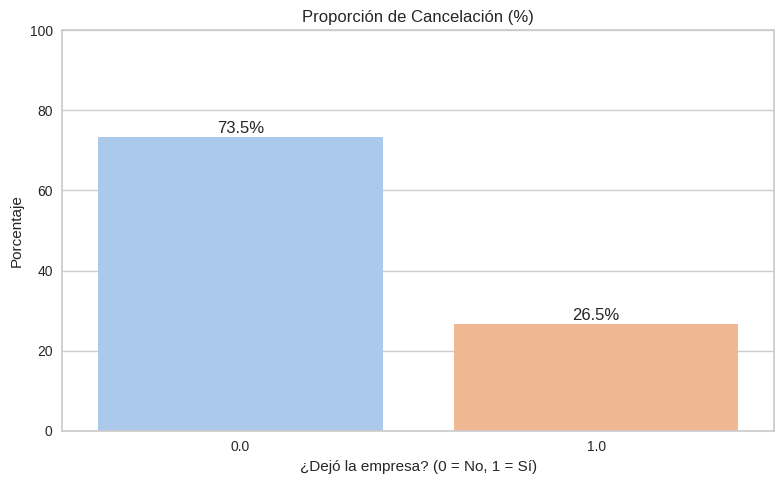

In [ ]:
#Graficamos la propoción

df_proporcion = proporcion_cancelacion.reset_index()
df_proporcion.columns = ['Dejo_la_empresa?', 'Proporcion']

# Graficamos con Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data = df_proporcion, x='Dejo_la_empresa?', y='Proporcion', palette='pastel')

# Etiquetas y formato
plt.title('Proporción de Cancelación (%)')
plt.xlabel('¿Dejó la empresa? (0 = No, 1 = Sí)')
plt.ylabel('Porcentaje')
plt.ylim(0, 100)
for index, row in df_proporcion.iterrows():
    plt.text(index, row.Proporcion + 1, f"{row.Proporcion:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Dejo_la_empresa?                         7043 non-null   float64
 1   Genero                                   7043 non-null   int64  
 2   Edad >= 65                               7043 non-null   int64  
 3   Tiene_Pareja                             7043 non-null   int64  
 4   Tiene_Dependientes                       7043 non-null   int64  
 5   Meses_contrato                           7043 non-null   int64  
 6   Facturacion_electronica                  7043 non-null   int64  
 7   Charges.Total                            7043 non-null   float64
 8   Suscurpción_telefono                     7043 non-null   int64  
 9   Suscurpción_internet                     7043 non-null   int64  
 10  Suscurpción_seguridad                    7043 non-nul

## Al existir un desbalanceo, lo recomendable es balancer la muestra para mejorar los resultados de nuestro modelo

# 🤖 **Modelado Predictivo**

In [ ]:
#Balanceamos las clases usando NearMiss

from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split

#Dividimos la base

X = datos_codificados.drop(columns = ['Dejo_la_empresa?'], axis = 1) #todas las demas variables
y = datos_codificados['Dejo_la_empresa?'] #la variable a predecir

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#Aplicamos NearMiss

nm = NearMiss()
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

print(y_train_nm.value_counts())


Dejo_la_empresa?
0.0    1318
1.0    1318
Name: count, dtype: int64


## **Modelo_1**

In [ ]:
#Modelo Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer

#Creamos el modelo
modelos_1 = RandomForestClassifier(max_depth = 10)

#Entrenamos el modelo
modelos_1.fit(X_train_nm, y_train_nm)

#Realizamos las predicciones
y_pred_1 = modelos_1.predict(X_test)

#Evaluamos
print("Porcentaje total de aciertos (Accuracy):", accuracy_score(y_test, y_pred_1))
print("De los que predijo como cancelación, cuantos fueron ciertos? (Precision):", precision_score(y_test, y_pred_1))
print("De los que cancelaron, cuantos logre identificar? (Recall):", recall_score(y_test, y_pred_1))
print("Equilibrio entre Precision y Racall (F1 Score):", f1_score(y_test, y_pred_1))

# Reporte completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_1))

Porcentaje total de aciertos (Accuracy): 0.5177472787505916
De los que predijo como cancelación, cuantos fueron ciertos? (Precision): 0.3171875
De los que cancelaron, cuantos logre identificar? (Recall): 0.7368421052631579
Equilibrio entre Precision y Racall (F1 Score): 0.4434735117422174

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.83      0.44      0.57      1562
         1.0       0.32      0.74      0.44       551

    accuracy                           0.52      2113
   macro avg       0.57      0.59      0.51      2113
weighted avg       0.69      0.52      0.54      2113



In [ ]:
#Usamos KFOLD para entrenar nuestro modelo con varios subgrupos para ralizar una validación cruzada y mejorar la predicción
from sklearn.model_selection import KFold, cross_validate

# Inicializamos

kf = KFold(n_splits = 5, shuffle=True, random_state = 42)

resultados = cross_validate(modelos_1, X_train_nm, y_train_nm, cv = kf, scoring = {'accuracy': make_scorer(accuracy_score),'precision': make_scorer(precision_score),'recall': make_scorer(recall_score),'f1': make_scorer(f1_score)},return_train_score=False)

print("Promedio Accuracy:", resultados['test_accuracy'].mean())
print("Promedio Precision:", resultados['test_precision'].mean())
print("Promedio Recall:", resultados['test_recall'].mean())
print("Promedio F1 Score:", resultados['test_f1'].mean())

Promedio Accuracy: 0.6809628543499512
Promedio Precision: 0.6683576034059049
Promedio Recall: 0.7171024996148582
Promedio F1 Score: 0.6917936921146498


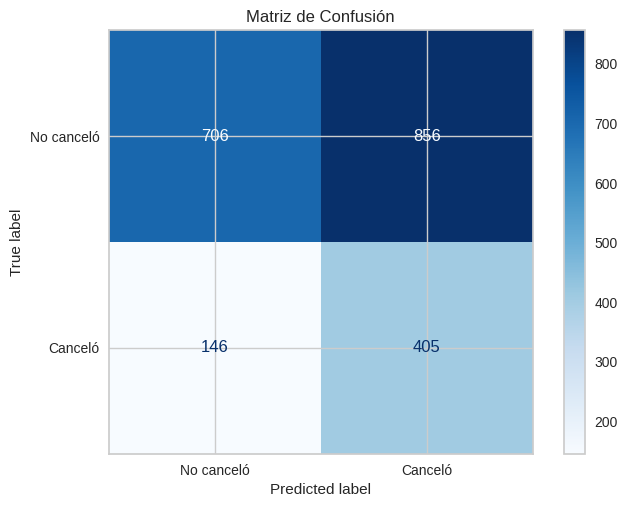

In [ ]:
#Creamos la Matriz de confusion

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_1, display_labels = ['No canceló', 'Canceló'], cmap = 'Blues')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
#Validamos la relevancia de cada varaible

importances = modelos_1.feature_importances_

features_importances = pd.DataFrame({'Features': X.columns, 'Importance': (importances * 100).round(2)}).sort_values('Importance', ascending = False)
features_importances

,Features,Importance
6,Charges.Total,19.55
4,Meses_contrato,16.84
15,Total_suscripciones,8.65
8,Suscurpción_internet,5.91
21,PaymentMethod_Electronic check,5.60
5,Facturacion_electronica,4.79
16,Tipo_contrato_Month-to-month,4.06
22,PaymentMethod_Mailed check,3.07
13,Suscurpción_TV,2.97
12,Suscurpción_soporte,2.84


In [ ]:
#Definimos la función
def calcular_clasificacion(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred)
    }

#Inicializamos el modelo base
model_features = RandomForestClassifier(max_depth=10, random_state=42)

#Creamos una lista para guardar resultados
ct_features = [i if i != 0 else 1 for i in range(0, 22, 2)]
resultados_dict = {}

#Evaluamos el modelo con distintas cantidades de variables importantes
for i in ct_features:
    selected_features = features_importances['Features'].values[:i]
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    model_features.fit(X_train_sel, y_train)
    y_pred = model_features.predict(X_test_sel)

    metricas = calcular_clasificacion(y_test, y_pred)
    resultados_dict[i] = metricas

# Convertimos a DataFrame
resultados = pd.DataFrame(resultados_dict).T
resultados.index.name = 'Cantidad de Variables'
print(resultados)

                       Accuracy  Precision    Recall        F1
Cantidad de Variables                                         
1                      0.747752   0.550000  0.179673  0.270862
2                      0.776148   0.603723  0.411978  0.489752
4                      0.782300   0.617571  0.433757  0.509595
6                      0.778041   0.600490  0.444646  0.510949
8                      0.780407   0.600000  0.473684  0.529412
10                     0.785140   0.620347  0.453721  0.524109
12                     0.789399   0.632500  0.459165  0.532072
14                     0.784666   0.620000  0.450091  0.521556
16                     0.788926   0.631579  0.457350  0.530526
18                     0.791292   0.635468  0.468240  0.539185
20                     0.794132   0.645729  0.466425  0.541623


In [ ]:
#las 13 features son las relevantes
selected_features = features_importances['Features'].values[:20]
X_selected_features = X[selected_features]
X_selected_features

,Charges.Total,Meses_contrato,Total_suscripciones,Suscurpción_internet,PaymentMethod_Electronic check,Facturacion_electronica,Tipo_contrato_Month-to-month,PaymentMethod_Mailed check,Suscurpción_TV,Suscurpción_soporte,Edad >= 65,Genero,Suscurpción_peliculas,Tiene_Pareja,Suscurpción_respaldo,Tiene_Dependientes,Tipo_contrato_One year,Suscurpción_seguridad,Suscurpción_telefono,Suscurpción_proteccion
0,593.30,9,5,1,0,1,0,1,1,1,0,1,0,1,1,1,1,0,1,0
1,542.40,9,3,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
2,280.85,4,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1237.85,13,6,1,1,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1
4,267.40,3,4,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,742.90,13,4,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,1,0
7263,1873.70,22,3,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0
7264,92.75,2,3,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0
7265,4627.65,67,6,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,1,1


In [ ]:
#realizamos la division de la base
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state = 42)


In [ ]:
#Definimos los parametros a evaluar
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split':[2, 4, 6],
    'n_estimators': [100, 150, 200]
}

#vamos a ajustar los hiperparametros y entrenamos
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits = 5, shuffle = True, random_state =42)
model_grid = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid = param_grid, cv = cv)

model_grid.fit(X_train_nm, y_train_nm)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]})

In [ ]:
#Identificamos caul fue la mejor combinación de parametros
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
#Creamos el modelo
modelos_1 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 200)

#Entrenamos el modelo
modelos_1.fit(X_train_nm, y_train_nm)

# Inicializamos

kf = KFold(n_splits = 5, shuffle=True, random_state = 42)

resultados = cross_validate(modelos_1, X_train_nm, y_train_nm, cv = kf, scoring = {'accuracy': make_scorer(accuracy_score),'precision': make_scorer(precision_score),'recall': make_scorer(recall_score),'f1': make_scorer(f1_score)},return_train_score=False)

print("Promedio Accuracy:", resultados['test_accuracy'].mean())
print("Promedio Precision:", resultados['test_precision'].mean())
print("Promedio Recall:", resultados['test_recall'].mean())
print("Promedio F1 Score:", resultados['test_f1'].mean())

Promedio Accuracy: 0.6904433327583233
Promedio Precision: 0.6773312033160915
Promedio Recall: 0.725360574231623
Promedio F1 Score: 0.7004771861818335


## **Modelo_2**

In [ ]:
#Modelo Vecinos Cercanos
from sklearn.neighbors import KNeighborsClassifier

#Escalamos los datos para el modelo KNN
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train_nm)
X_test_scaler = scaler.transform(X_test)

#Creamos el modelo
modelos_2 = KNeighborsClassifier(n_neighbors = 5)

#Entranamos el modelo
modelos_2.fit(X_train_scaler, y_train_nm)

#Realizamos las predicciones
y_pred_2 = modelos_2.predict(X_test_scaler)

#Evaluamos
print("Porcentaje total de aciertos (Accuracy):", accuracy_score(y_test, y_pred_2))
print("De los que predijo como cancelación, cuantos fueron ciertos? (Precision):", precision_score(y_test, y_pred_2))
print("De los que cancelaron, cuantos logre identificar? (Recall):", recall_score(y_test, y_pred_2))
print("Equilibrio entre Precision y Racall (F1 Score):", f1_score(y_test, y_pred_2))

print(classification_report(y_test, y_pred_2))

Porcentaje total de aciertos (Accuracy): 0.6180785612872692
De los que predijo como cancelación, cuantos fueron ciertos? (Precision): 0.3693877551020408
De los que cancelaron, cuantos logre identificar? (Recall): 0.6569872958257713
Equilibrio entre Precision y Racall (F1 Score): 0.472893533638145
              precision    recall  f1-score   support

         0.0       0.83      0.60      0.70      1562
         1.0       0.37      0.66      0.47       551

    accuracy                           0.62      2113
   macro avg       0.60      0.63      0.59      2113
weighted avg       0.71      0.62      0.64      2113



In [ ]:
#Usamos KFOLD para entrenar nuestro modelo con varios subgrupos para ralizar una validación cruzada y mejorar la predicción

# Inicializamos

kf = KFold(n_splits = 5, shuffle=True, random_state = 42)

resultados = cross_validate(modelos_2, X_train_scaler, y_train_nm, cv = kf, scoring = {'accuracy': make_scorer(accuracy_score),'precision': make_scorer(precision_score),'recall': make_scorer(recall_score),'f1': make_scorer(f1_score)},return_train_score=False)

print("Promedio Accuracy:", resultados['test_accuracy'].mean())
print("Promedio Precision:", resultados['test_precision'].mean())
print("Promedio Recall:", resultados['test_recall'].mean())
print("Promedio F1 Score:", resultados['test_f1'].mean())

Promedio Accuracy: 0.6320280604910586
Promedio Precision: 0.6269783961457378
Promedio Recall: 0.6504665477591046
Promedio F1 Score: 0.6384195660698865


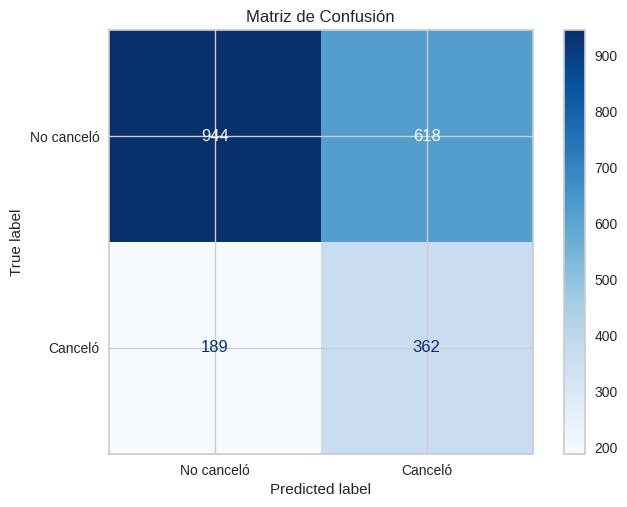

In [ ]:
#Creamos la Matriz de confusion

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_2, display_labels = ['No canceló', 'Canceló'], cmap = 'Blues')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
#Elegimos un índice del conjunto de prueba
indice = 0  #se puedes cambiar por cualquier otro

#Observación a evaluar
observacion = X_test_scaler[indice].reshape(1, -1)  #el .reshape es para dejarlo en formato matriz

#Obtenemos los vecinos más cercanos
distancias, indices = modelos_2.kneighbors(observacion)

#Mostramos las distancias
print("Distancias a los vecinos más cercanos:", distancias[0])

#Clases reales de los vecinos
clases_vecinos = y_train_nm.iloc[indices[0]]

#Predicción del modelo
prediccion = modelos_2.predict(observacion)[0]

#Resultados
print("Clases de los vecinos más cercanos:", clases_vecinos.values)
print("Predicción del indice seleccionado:", prediccion)

Distancias a los vecinos más cercanos: [3.05915007 3.4134045  3.41556431 3.94169826 4.32254977]
Clases de los vecinos más cercanos: [0. 0. 0. 0. 0.]
Predicción del indice seleccionado: 0.0


#📋 **Interpretación y Conclusiones**

## **Desarrollo de modelos predictivos para prever que clientes tiene mayor probabilidad de cancelar**

Con base en un conjunto histórico de datos de clientes de la empresa TelecomX, que incluía 7,267 registros y 31 variables, se planteó el desarrollo de un modelo predictivo con el objetivo de identificar qué clientes tienen una mayor probabilidad de cancelar sus servicios en el futuro.

1. Preparación y limpieza de los datos

Como primer paso, se realizó una depuración del conjunto de datos. Se identificaron 224 registros sin información en la variable objetivo (“¿Dejó la empresa?”), por lo que dichos registros fueron eliminados para evitar distorsiones en el análisis.

Posteriormente, se llevó a cabo un análisis de correlación entre variables, con el fin de identificar redundancias y relaciones fuertes que permitieran simplificar la base sin pérdida significativa de información. Entre las variables evaluadas destacan:

•	¿Dejó la empresa? (cancelación)

•	Total de suscripciones

•	Cuentas diarias

•	Cargos mensuales

•	Cargos totales

•	Meses de contrato

•	¿Tiene pareja?

•	¿Tiene dependientes?

•	Género

A partir del análisis de correlaciones:


	Charges.Total	Total_suscripciones	Charges.Monthly	Cuentas_Diarias
Charges.Total	1.000000	0.745065	0.650864	0.650864
Total_suscripciones	0.745065	1.000000	0.822187	0.822187
Charges.Monthly	0.650864	0.822187	1.000000	1.000000
Cuentas_Diarias	0.650864	0.822187	1.000000	1.000000

 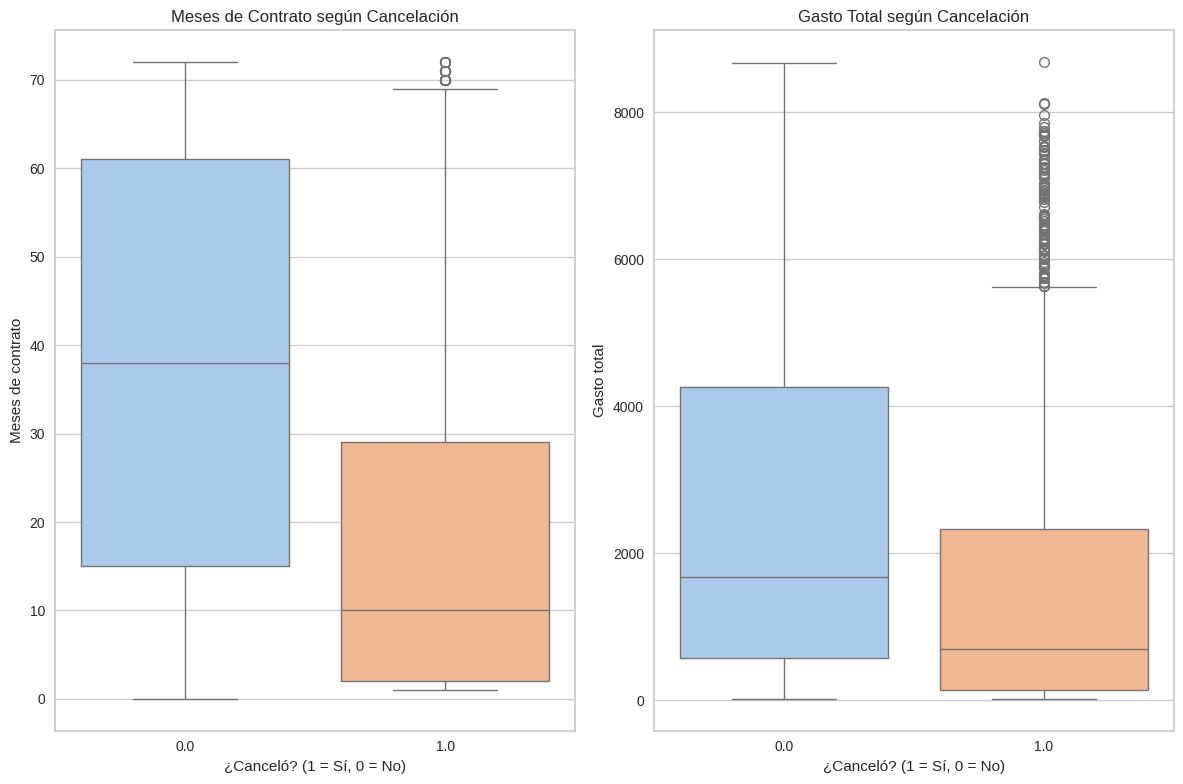

Se decidió eliminar las variables Cuentas Diarias y Cargos Mensuales por su alta correlación con Cargos Totales, lo cual evitó multicolinealidad. Asimismo, se descartaron columnas binarias que indicaban si el cliente tenía ciertos servicios, ya que esta información estaba duplicada en las variables numéricas de suscripciones. Como resultado, la base fue optimizada a un total de 19 variables.

2. Análisis del balance de clases

Se analizó la distribución de la variable objetivo, encontrando un desbalance significativo entre clientes que cancelaron y los que no. Para mitigar este problema y mejorar el rendimiento del modelo, se optó por igualar el número de observaciones de ambas clases, ajustando a la clase minoritaria y evitando generar registros sintéticos.

 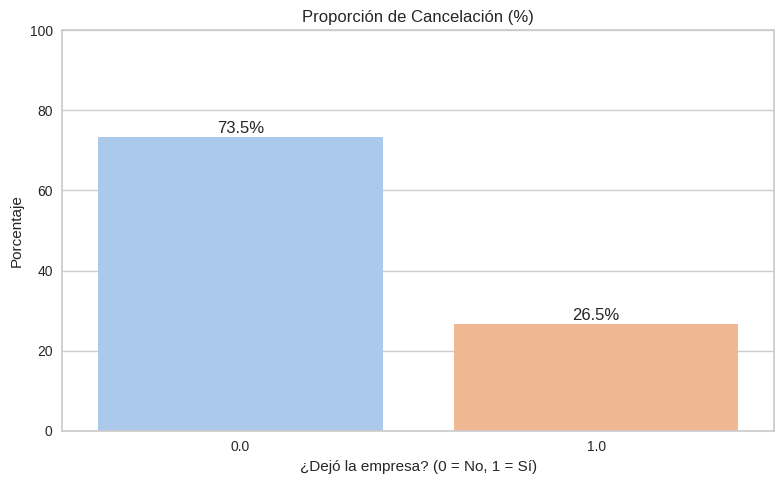

3. Modelo Random Forest

Una vez preprocesados los datos, se entrenó un modelo basado en Random Forest, obteniendo los siguientes resultados promedio tras validación cruzada:

•	Accuracy: 0.6904

•	Precision: 0.6773

•	Recall: 0.7254

•	F1 Score: 0.7005


Estos resultados indican un buen desempeño general del modelo, con especial fortaleza en la capacidad de detección de clientes que efectivamente cancelan (recall).

También se desarrolló la matriz de confusión

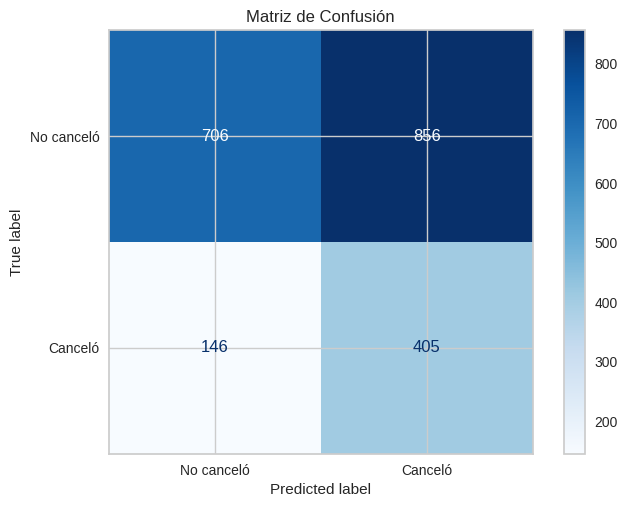

4. Modelo K-Nearest Neighbors (KNN)

Posteriormente se implementó un segundo modelo, K-Nearest Neighbors (KNN), el cual requiere normalización de las variables. Tras aplicar la técnica de escalamiento y entrenar el modelo, se obtuvieron los siguientes resultados:

•	Accuracy: 0.6320

•	Precision: 0.6270

•	Recall: 0.6505

•	F1 Score: 0.6384


De igual forma se desarrolló la Matriz de confusión

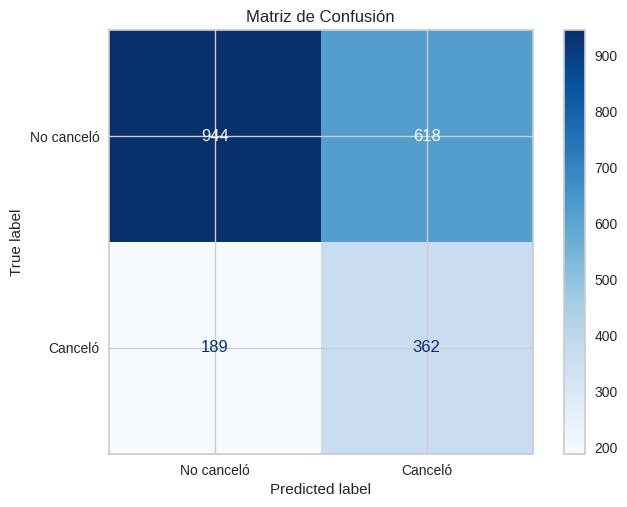

Aunque el desempeño del modelo KNN fue aceptable, sus métricas fueron inferiores a las obtenidas con Random Forest.

5. Comparación entre modelos

Métrica	Random Forest 	KNN

Accuracy	0.6904	0.6320

Precision	0.6773	0.6270

Recall	0.7254	0.6505

F1 Score	0.7005	0.6384


6. Conclusiones:

•	Random Forest superó a KNN en todas las métricas evaluadas, por lo que se recomienda como modelo principal para implementar en la empresa.

•	El Recall del modelo Random Forest (0.7254) indica una mayor capacidad para identificar correctamente a los clientes que efectivamente cancelan.

•	La métrica F1 Score también fue más alta y equilibrada en Random Forest, lo que sugiere un mejor balance entre falsos positivos y falsos negativos.

•	Aunque KNN puede ser útil como modelo base o de comparación, su rendimiento fue inferior al menos en un 5% en todas las métricas clave.

7. Recomendaciones

A partir de los hallazgos obtenidos en el análisis exploratorio y el desarrollo de modelos predictivos, se proponen las siguientes estrategias para mejorar la retención de clientes en la empresa TelecomX:

•	Implementar el modelo Random Forest como herramienta predictiva:

Dado su superior desempeño en todas las métricas clave (Accuracy, Precision, Recall y F1 Score), se recomienda utilizar el modelo de Random Forest como base para identificar a los clientes con mayor probabilidad de cancelar sus servicios. Esta herramienta permitirá a la empresa tomar decisiones más informadas, proactivas y focalizadas, mejorando la efectividad de las estrategias de fidelización.

•	Ofertas personalizadas para clientes sin dependientes:

El análisis demostró que los clientes sin dependientes presentan una mayor tendencia a cancelar. Por lo tanto, se sugiere desarrollar paquetes exclusivos y personalizados para este segmento, que ofrezcan beneficios diferenciados y mayor valor percibido, alineados con su perfil y necesidades.

•	Fomento de paquetes combinados de servicios:

Se identificó una relación positiva entre la cantidad de servicios contratados y la permanencia del cliente. En consecuencia, se recomienda incentivar la contratación de combos o paquetes de servicios con precios preferenciales y beneficios escalables a medida que se contraten más servicios.

•	Optimización e incentivo del uso de métodos de pago automáticos:

Mejorar la experiencia de pago también puede impactar la permanencia del cliente. Se propone promover el uso de métodos de pago automáticos (como tarjetas de crédito o débitos directos), ofreciendo a cambio beneficios tangibles, como acumulación de puntos, descuentos o facilidad en la gestión de pagos.

•	Promoción de contratos de mayor duración:

Para reducir la rotación, se recomienda fomentar la contratación de planes semestrales o anuales, apoyándose en incentivos como descuentos por fidelidad, promociones especiales o regalos vinculados a los servicios adquiridos.




